In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("EPL.csv")

In [2]:
df = df.drop(columns=["MatchID", "Date", "Time", "Referee"])

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())  


In [5]:
categorical_columns = ["Season", "HomeTeam", "AwayTeam", "FullTimeResult", "HalfTimeResult"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
X = df.drop(columns=["FullTimeResult"])  
y = df["FullTimeResult"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Unique values in y_train:", np.unique(y_train, return_counts=True))
print("Unique values in y_test:", np.unique(y_test, return_counts=True))

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Unique values in y_pred:", np.unique(y_pred, return_counts=True))


Unique values in y_train: (array([0, 1, 2], dtype=int64), array([555, 380, 744], dtype=int64))
Unique values in y_test: (array([0, 1, 2], dtype=int64), array([139, 108, 173], dtype=int64))
Unique values in y_pred: (array([0, 1, 2], dtype=int64), array([139, 108, 173], dtype=int64))


In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

In [9]:
print("=== Naïve Bayes Model Performance ===")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Naïve Bayes Model Performance ===
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       173

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



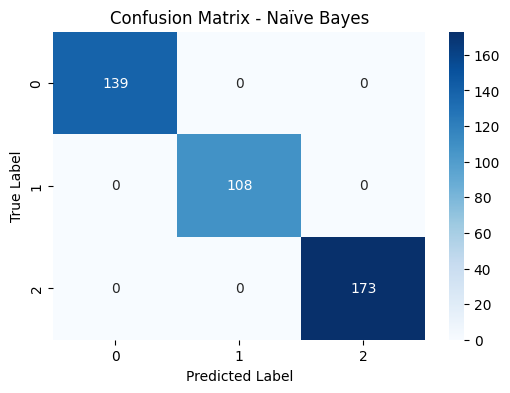

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["FullTimeResult"].classes_, yticklabels=label_encoders["FullTimeResult"].classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()